In [1]:
import pandas as pd
import numpy as np

from importlib import reload

%matplotlib inline

In [37]:
import gameplan.helpers as hp
import gameplan.income_streams
import gameplan.expenses
import gameplan.user

reload(gameplan.income_streams)
reload(gameplan.expenses)
reload(gameplan.user)
from gameplan.income_streams import IncomeStream, Salary
from gameplan.user import User


In [38]:
usr = User('example@gmail.com')
usr.user_id

'1022232228'

In [39]:
s = Salary(120000/24, payday_freq='SM', next_paycheck_dt=hp.get_next_date_offset('SM', pd.datetime(2019,7,4)))

Annual salary is $120,000


,salary
2020-05-15,5000.0
2020-05-31,5000.0
2020-06-15,5000.0
2020-06-30,5000.0
2020-07-15,5000.0


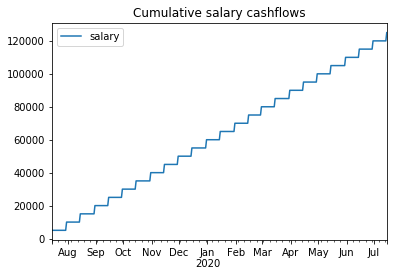

In [40]:
print(f"Annual salary is ${s.annualized_salary:,.0f}")
s.plot_cash_flows(cumulative=True, title='Cumulative salary cashflows')
s.cash_flows.tail()

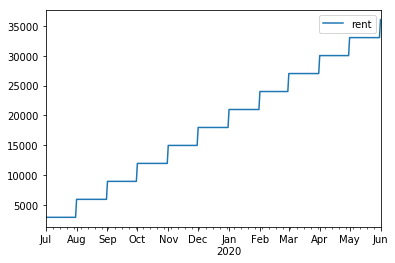

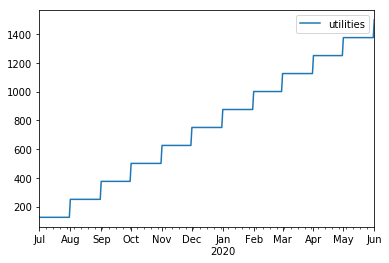

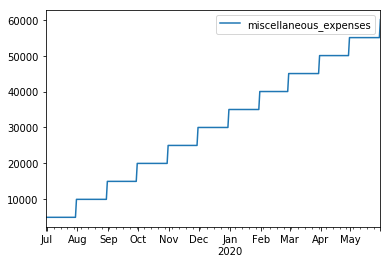

In [41]:
r = gameplan.expenses.Rent(3000)
u = gameplan.expenses.Utilities(125)
misc = gameplan.expenses.Expense(
    expense_type='miscellaneous_expenses', 
    amount=5000, 
    recurring=True, 
    start_dt=pd.datetime.today(),
    freq='M'
)

expenses = [r, u, misc]
for exp in expenses: 
    exp.plot_cash_flows()

In [42]:
usr.add_income_stream(s)
for exp in expenses:
    usr.add_expense(exp)

In [43]:
usr.cash_flows_df.head()

,salary,total_income,rent,utilities,miscellaneous_expenses,total_expenses
2019-06-30,0.0,0.0,0.0,0.0,-5000.0,-5000.0
2019-07-01,0.0,0.0,-3000.0,-125.0,0.0,-3125.0
2019-07-15,5000.0,5000.0,0.0,0.0,0.0,0.0
2019-07-31,5000.0,5000.0,0.0,0.0,-5000.0,-5000.0
2019-08-01,0.0,0.0,-3000.0,-125.0,0.0,-3125.0


In [44]:
usr.agg_cash_flows('Q')

,salary,total_income,rent,utilities,miscellaneous_expenses,total_expenses
2019-06-30,0.0,0.0,0.0,0.0,-5000.0,-5000.0
2019-09-30,30000.0,30000.0,-9000.0,-375.0,-15000.0,-24375.0
2019-12-31,30000.0,30000.0,-9000.0,-375.0,-15000.0,-24375.0
2020-03-31,30000.0,30000.0,-9000.0,-375.0,-15000.0,-24375.0
2020-06-30,30000.0,30000.0,-9000.0,-375.0,-10000.0,-19375.0
2020-09-30,5000.0,5000.0,0.0,0.0,0.0,0.0


In [45]:
usr.net_cash_flow.head()

2019-06-30   -5000.0
2019-07-01   -3125.0
2019-07-15    5000.0
2019-07-31       0.0
2019-08-01   -3125.0
dtype: float64

In [48]:
usr.agg_net_cash_flows('D').head()

2019-06-30   -5000.0
2019-07-01   -3125.0
2019-07-02       0.0
2019-07-03       0.0
2019-07-04       0.0
Freq: D, dtype: float64

In [49]:
usr.total_expenses.tail()

2020-04-01    3125.0
2020-04-30    5000.0
2020-05-01    3125.0
2020-05-31    5000.0
2020-06-01    3125.0
Name: total_expenses, dtype: float64

In [50]:
usr.total_income.tail()

2020-05-15    5000.0
2020-05-31    5000.0
2020-06-15    5000.0
2020-06-30    5000.0
2020-07-15    5000.0
Freq: SM-15, Name: total_income, dtype: float64

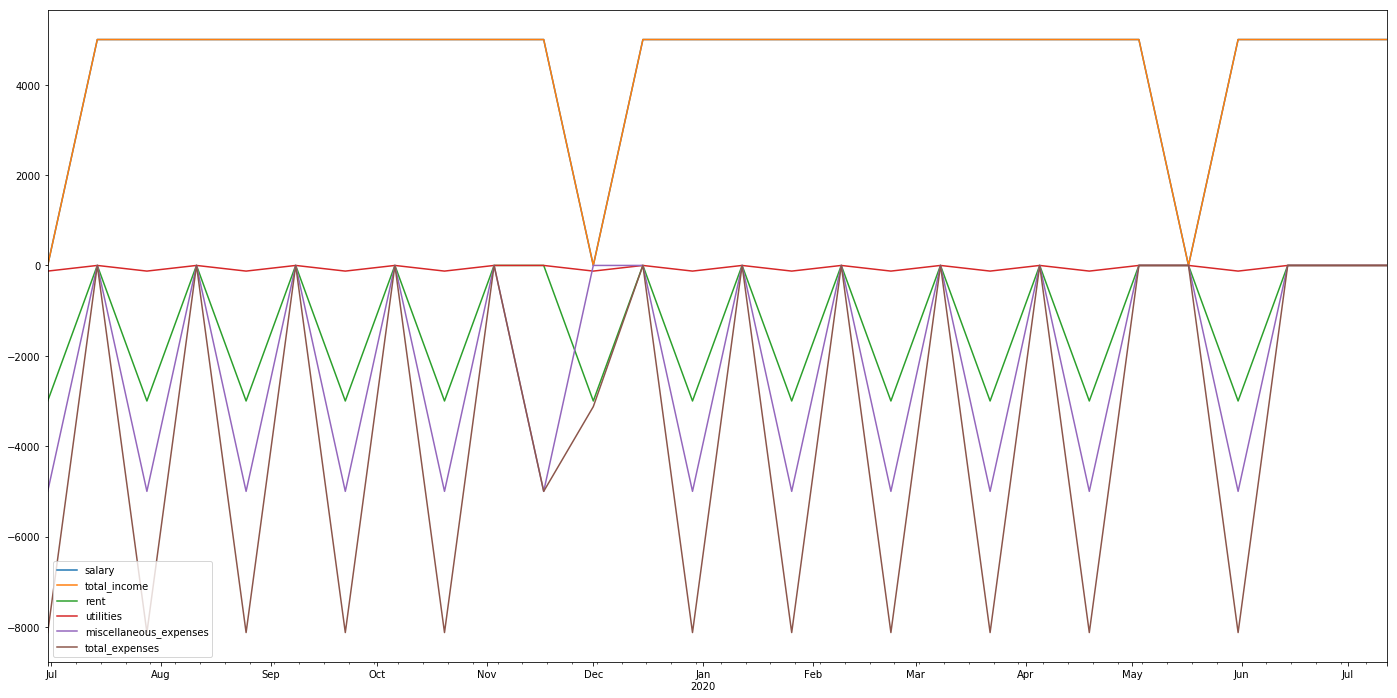

In [60]:
usr.agg_cash_flows('14D').plot(figsize=(24,12))

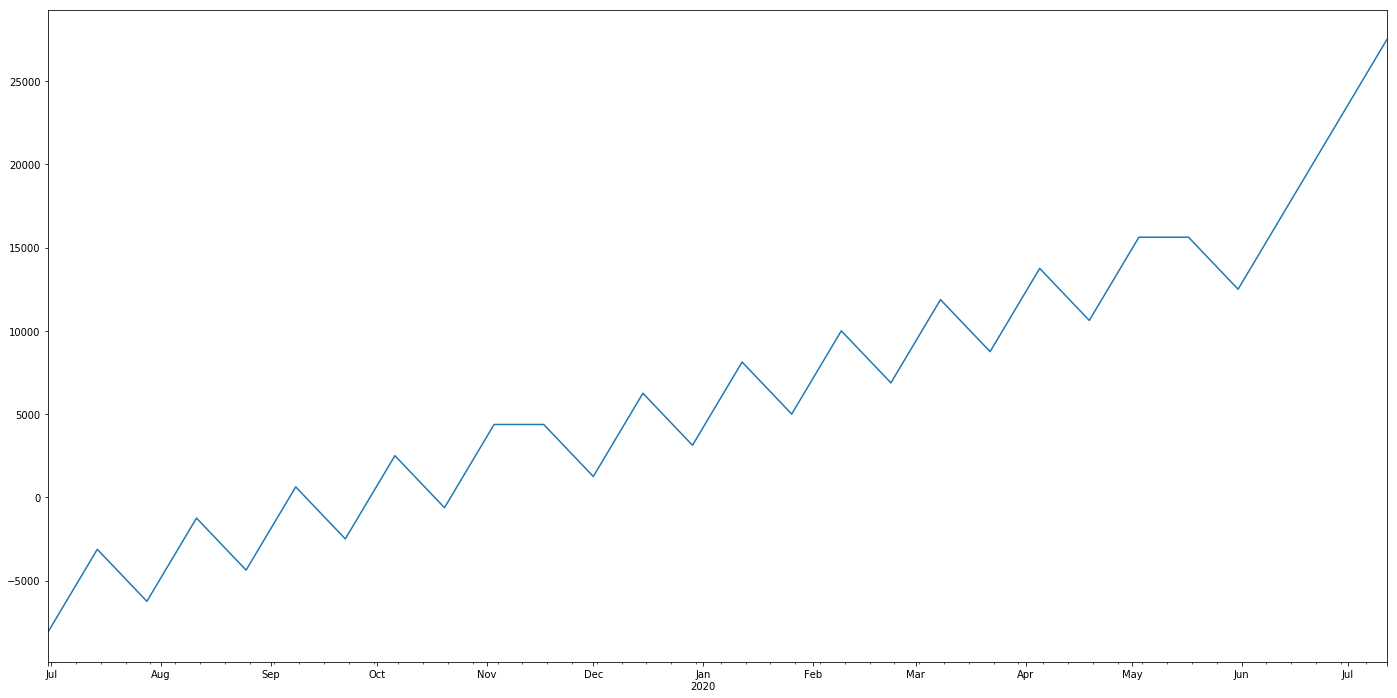

In [61]:
usr.agg_net_cash_flows('14D').cumsum().plot(figsize=(24,12))